# Name: ISHA SINGH
# The Sparks Foundation #GRIPAPR2021
# Task : Exploratory Data Analysis - Retail

**Problem Statement**
- As a business manager, try to find out the weak areas where you can work to make more profit. 
- What all business problems you can derive by exploring the data?

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
#importing the data set
sales = pd.read_csv('SampleSuperstore.csv')

In [4]:
sales.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
sales.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# The Postal Code column is of no use for us. Hence we drop it
sales.drop('Postal Code',axis=1,inplace=True)

In [7]:
#Checking for any null values
sales.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#Checking for duplicated values
sales.duplicated().sum()

50

In [9]:
#dropping the duplicated values
sales.drop_duplicates(inplace=True)

In [10]:
sales.shape

(9944, 12)

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   Country       9944 non-null   object 
 3   City          9944 non-null   object 
 4   State         9944 non-null   object 
 5   Region        9944 non-null   object 
 6   Category      9944 non-null   object 
 7   Sub-Category  9944 non-null   object 
 8   Sales         9944 non-null   float64
 9   Quantity      9944 non-null   int64  
 10  Discount      9944 non-null   float64
 11  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1009.9+ KB


In [12]:
sales.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

We divide the variables into two categories and analyze each of them separately.
- **Categorical Variables** 
1. Ship Mode
2. Segment
3. Region
4. Category
5. Subcategory
6. State
---
- **Numerical Variables**
1. Sales
2. Quantity
3. Discount
4. Profit

**Before starting with the analysis, here is a list of possible questions that can be answered on the basis of the data:**
1. What is the correlation between the differnt variables?
2. Which ship mode generates the highest( and least) profit?
3. Which Category generates the highest( and least) profit?
4. Which Sub-Category generates the highest( and least) profit?
5. Which Region generates the highest( and least) profit?
6. Which State generates the highest( and least) profit?
7. Which City generates the highest( and least) profit?
8. Find out the highest (and lowest) contributor of sales in each category


# Correlation between the variables

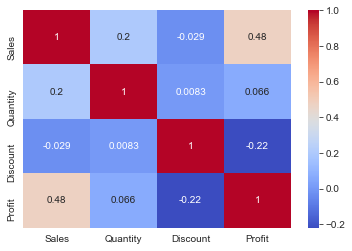

In [13]:
sns.heatmap(sales.corr(),annot=True,cmap='coolwarm')

We can infer that :
- **Sales** and **Profit** are **positively correlated** which makes sense, since profit increases as sales increases.
- **Discount** and **Profit** are negetively correlated. More discounts leads to less profit.
- **Quantity** and **Profit** are moderately correlated.
- **Sales** and **Discount** are negetively correlated.

Text(0.5, 1.0, 'Relationship between Sales and Profit')

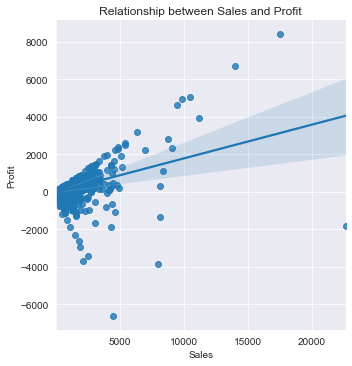

In [14]:
sns.lmplot(x ='Sales', y ='Profit', data=sales)
plt.title('Relationship between Sales and Profit')

# Univariate Analysis

Text(0.5, 1.0, 'Category')

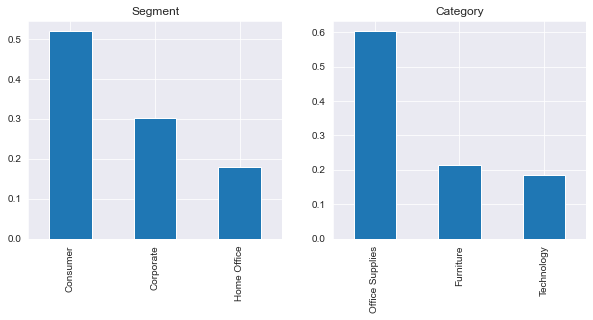

In [15]:
#Analyzing Categorical variables
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
sales['Segment'].value_counts(normalize=True).plot.bar()
plt.title('Segment')
plt.subplot(122)
sales['Category'].value_counts(normalize=True).plot.bar()
plt.title('Category')

From the above graphs, we can infer that:
1. 60% of the products supplied are **Office Supplies**.
2. Approximately 50% of the products are supplied to the **Consumer** segment.

Text(0.5, 1.0, 'Region')

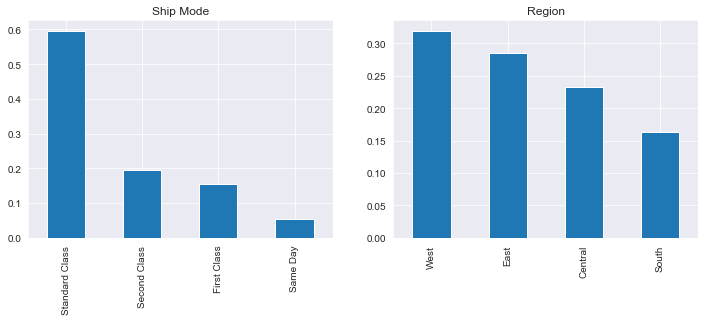

In [16]:
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
sales['Ship Mode'].value_counts(normalize=True).plot.bar()
plt.title('Ship Mode')
plt.subplot(122)
sales['Region'].value_counts(normalize=True).plot.bar()
plt.title('Region')

from the above graphs, we can infer that:
1. Approximately 60% of the products are shipped through the **Standard Class**.
2. Approximately 30% of the products are supplied in the **West Region**.

Text(0.5, 1.0, 'Sub-Category')

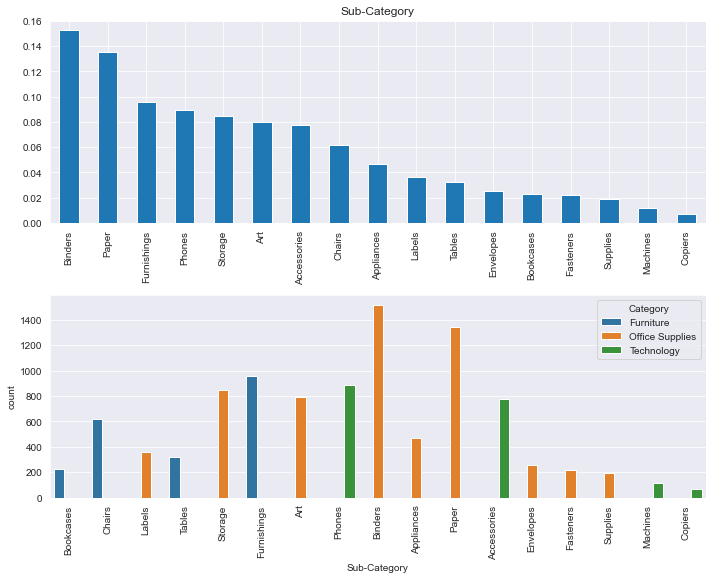

In [17]:
plt.figure(figsize=(10,8))
plt.subplot(212)
sns.countplot(x='Sub-Category',data=sales,hue='Category')
plt.xticks(rotation=90)
plt.subplot(211)
sales['Sub-Category'].value_counts(normalize=True).plot.bar()
plt.tight_layout()
plt.title('Sub-Category')

**Observations**
- It could be seen that around with around 15%, **Binders** becomes the most supplied **Sub-Category**.
- The most supplied goods are from the **Office Supplies** category, which we have already seen while visualizing the **Category variable**.

Text(0.5, 1.0, 'Countplot of the States')

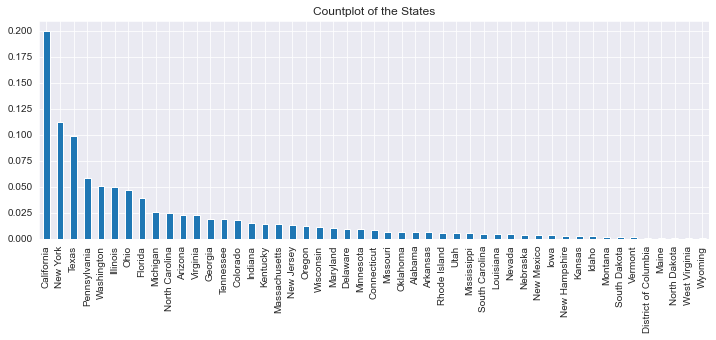

In [18]:
#Looking at the distribution of 'State' Variable 
plt.figure(figsize=(12,4))
sales['State'].value_counts(normalize=True).plot.bar()
plt.title('Countplot of the States')

It can be infered from the above graph that the **Top 3 States with maximum supply of goods** are:
1. **California**
2. **New York**
3. **Texas**

# Distribution plots

(0.0, 5000.0)

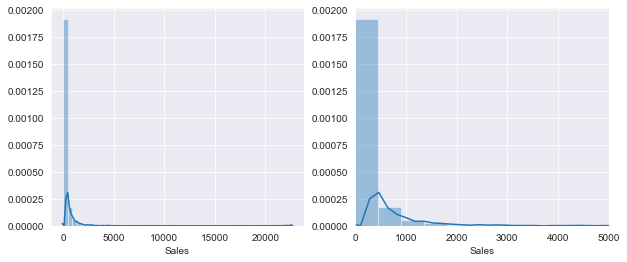

In [19]:
#Analyzing the Numerical variables
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(sales['Sales'])
plt.subplot(122)
sns.distplot(sales['Sales'])
plt.xlim([0,5000])

It can be infered that **the distribution is rightly skewed.**

(-2000.0, 2000.0)

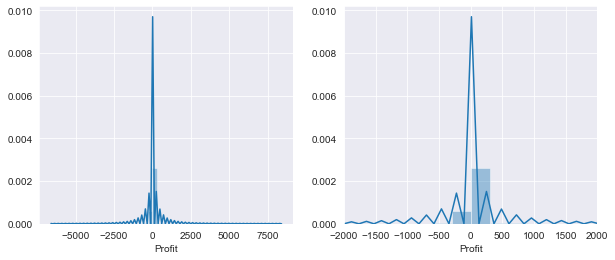

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(sales['Profit'])
plt.subplot(122)
sns.distplot(sales['Profit'])
plt.xlim([-2000,2000])

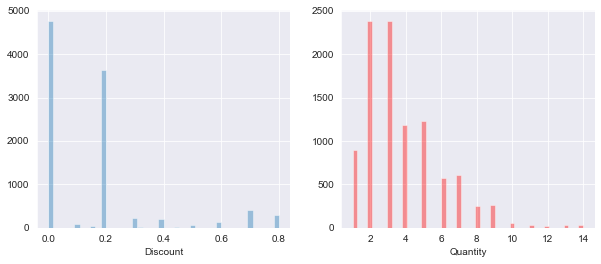

In [21]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.distplot(sales['Discount'],ax=axs[0],kde=False)
sns.distplot(sales['Quantity'],ax=axs[1],color='r',kde=False)

# Bivariate Analysis

# 1. Category Wise Profit and Sales Analysis

In [22]:
category_mean = sales.groupby('Category')[['Sales','Profit']].mean()
category_mean

,Sales,Profit
Category,,
Furniture,350.316304,8.744061
Office Supplies,119.989320,20.413644
Technology,453.240044,78.859295


Text(0.5, 1.0, 'Profit and Sales Analysis of Category')

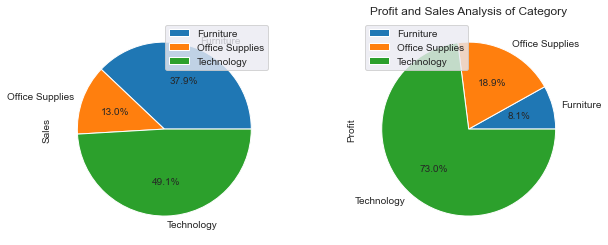

In [23]:
category_mean.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(10,4))
plt.legend(loc='upper left')
plt.title('Profit and Sales Analysis of Category')

Text(0.5, 1.0, 'Category Wise Profit VS Sale')

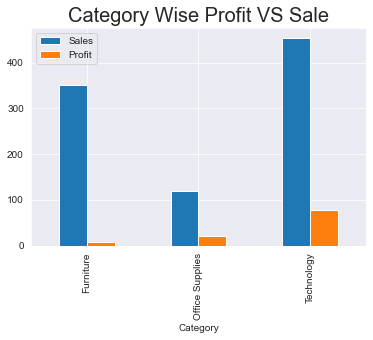

In [24]:
category_mean.plot.bar()
plt.title('Category Wise Profit VS Sale',fontdict={'fontsize':20})

- Hence, **the highest profit generating category** is the **Technology category**.
- It can also be concluded that even though the **Furniture** Category has a good sale, **it generates the least profit**.

# 2. Segment Wise Profit and Sales Analysis

In [25]:
segment_mean_profit = sales.groupby('Segment')[['Sales','Profit']].mean()

In [26]:
segment_mean_profit

,Sales,Profit
Segment,,
Consumer,224.693317,25.957272
Corporate,234.697538,30.555572
Home Office,241.673237,33.922790


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CCF4AEC70>,
      dtype=object)

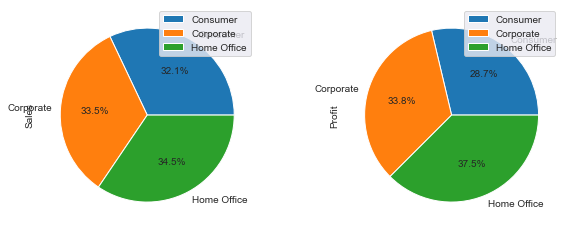

In [27]:
segment_mean_profit.plot.pie(subplots=True,autopct = '%1.1f%%',figsize=(10,4))

Text(0.5, 1.0, 'Segment Wise Profit VS Sale')

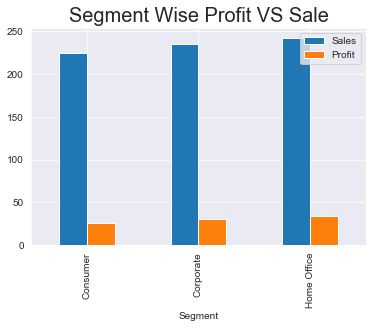

In [28]:
segment_mean_profit.plot.bar()
plt.title('Segment Wise Profit VS Sale',fontdict={'fontsize':20})

- **Maximum Profit Generating segment : Home Office**
- Overall, the Segments have profit fairly distributed among the 3 categories: Consumer, Corporate, Home Office.

# 3. Ship Mode Wise Profit and Sales Analysis

In [29]:
ship_profit = sales.groupby('Ship Mode')[['Sales','Profit']].mean()
ship_profit

,Sales,Profit
Ship Mode,,
First Class,229.441300,31.946733
Same Day,236.755950,29.283924
Second Class,236.539947,29.585560
Standard Class,228.647383,27.637378


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CCF394DC0>,
      dtype=object)

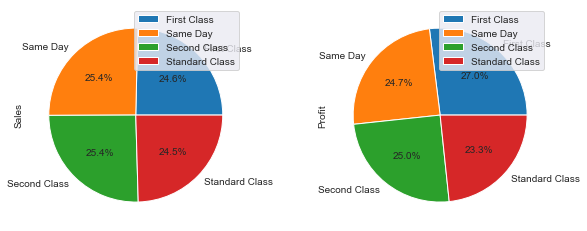

In [30]:
ship_profit.plot.pie(subplots=True,autopct = '%1.1f%%',figsize=(10,4))

Text(0.5, 1.0, 'Shipping Mode Wise Profit VS Sale')

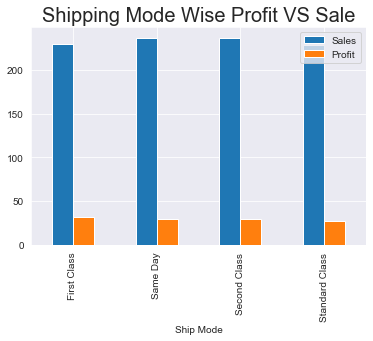

In [31]:
ship_profit.plot.bar()
plt.title('Shipping Mode Wise Profit VS Sale',fontdict={'fontsize':20})

**Highest Profit Generating Ship Mode : First Class**

# 4. Region Wise Profit and Sales Analysis 

In [32]:
region_mean_profit = sales.groupby('Region')[['Sales','Profit']].mean()
region_mean_profit

,Sales,Profit
Region,,
Central,216.295581,17.132634
East,239.351662,32.299114
South,241.803645,28.857673
West,227.985299,34.062005


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CCD90F760>,
      dtype=object)

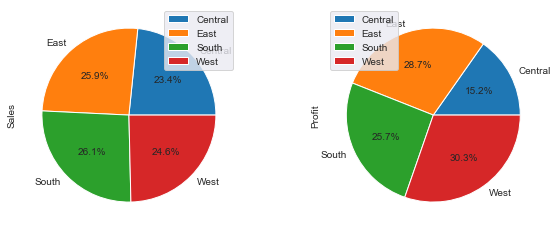

In [33]:
region_mean_profit.plot.pie(subplots=True,autopct="%1.1f%%",figsize=(10,4))

Text(0.5, 1.0, 'Region Wise Profit VS Sales')

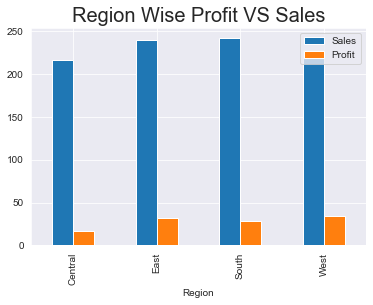

In [34]:
region_mean_profit.plot.bar()
plt.title('Region Wise Profit VS Sales',fontdict={'fontsize':20})

**Highest Profit generating region : West**

# 5. Sub-Category Wise Profit and Sales Analysis

In [35]:
sub_cat_profits = sales.groupby('Sub-Category')[['Sales','Profit']].mean()
sub_cat_profits

,Sales,Profit
Sub-Category,,
Accessories,216.433767,54.231443
Appliances,230.755710,38.922758
Art,34.130810,8.211650
Binders,133.945230,19.898063
Bookcases,505.163404,-15.038735
Chairs,532.971969,43.198582
Copiers,2198.941618,817.909190
Envelopes,64.867724,27.418019
Fasteners,13.936774,4.375660


Text(0.5, 1.0, 'Sub-Category Wise Profit VS Sale')

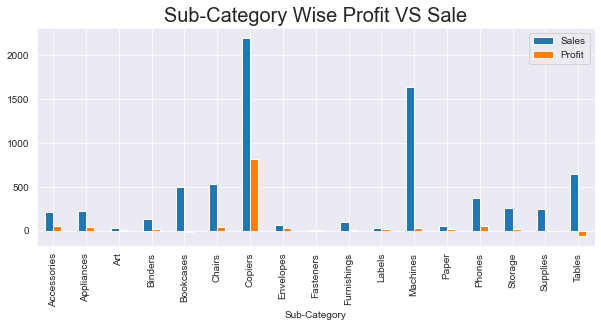

In [36]:
sub_cat_profits.plot.bar(figsize=(10,4))
plt.title('Sub-Category Wise Profit VS Sale',fontdict={'fontsize':20})

Observations:
- **Highest Profit generating sub-category : Copiers**
- It could be seen that though the sales for machines is quite high but the profit generated is not so good. Hence, a business manager should reconsider the sales of Machines.

# 6. State Wise Profit and Sales Analysis

In [37]:
sales_state = sales['State'].unique()
sales_state

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [38]:
#Analyzing profit
state_wise_profit = sales.groupby('State')[['Profit']].mean().sort_values(by='Profit')
state_wise_profit

,Profit
State,
Ohio,-36.237859
Colorado,-35.867351
North Carolina,-30.083985
Tennessee,-29.189583
Pennsylvania,-26.835309
Texas,-26.278738
Illinois,-25.700607
Arizona,-15.303235
Oregon,-9.708124


Text(0.5, 1.0, 'Mean profit of Bottom 30 States')

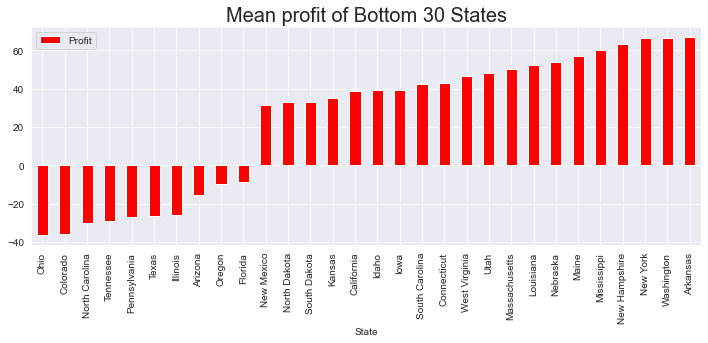

In [39]:
state_wise_profit.sort_values('Profit').head(30).plot.bar(figsize=(12,4),color='r')
plt.title('Mean profit of Bottom 30 States',fontdict={'fontsize':20})

Text(0.5, 1.0, 'Mean Profit of Top 30 States')

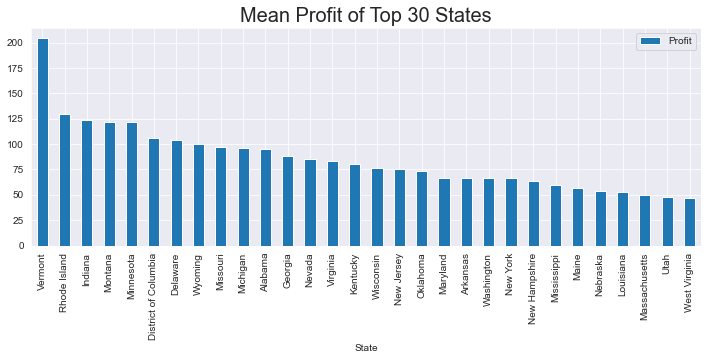

In [40]:
state_wise_profit.sort_values('Profit',ascending=False).head(30).plot.bar(figsize=(12,4))
plt.title('Mean Profit of Top 30 States',fontdict={'fontsize':20})

- **Highest Profit Generating State : Vermont**
- **Least Profit Generating State : Ohio**
----
**Sales Analysis**

In [41]:
#Analyzing Sales
state_wise_sale = sales.groupby('State')['Sales'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Sum of Sales of Top 30 States')

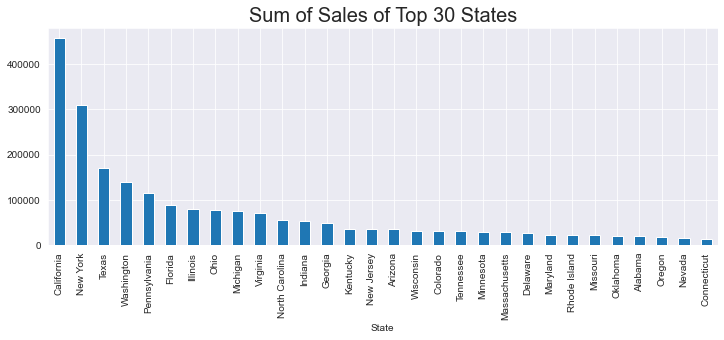

In [42]:
state_wise_sale.head(30).plot.bar(figsize=(12,4))
plt.title('Sum of Sales of Top 30 States',fontdict={'fontsize':20})

Text(0.5, 1.0, 'Sum of sales of Bottom 30 States')

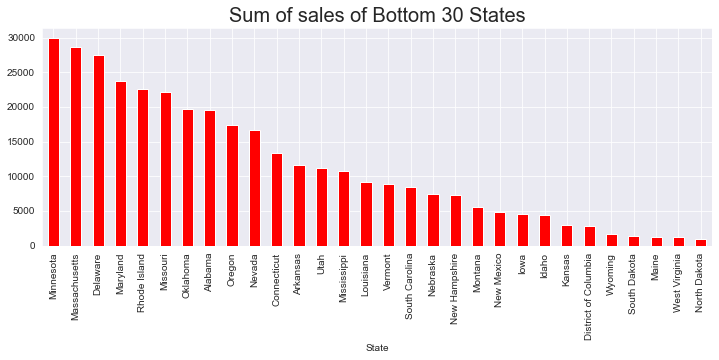

In [43]:
state_wise_sale.tail(30).plot.bar(figsize=(12,4),color='r')
plt.title('Sum of sales of Bottom 30 States',fontdict={'fontsize':20})

- **Highest Contributor of Sale : California**
- **Least Contributor of Sale : North Dakota**

# City Wise Profit and Sales Analysis

In [44]:
sales['City'].nunique()

531

In [45]:
#Bottom 10 cities
city_profit_bottom = sales.groupby('City')['Profit'].mean().sort_values()
city_profit_bottom.head(10)

City
Bethlehem     -200.619160
Champaign     -182.352000
Oswego        -178.709200
Round Rock    -169.061614
Lancaster     -157.371052
Clarksville   -150.764743
Medina        -149.227178
Burlington    -144.915088
San Antonio   -123.712715
Yuma          -116.497725
Name: Profit, dtype: float64

In [46]:
#Top 10 cities
city_profit_top = sales.groupby('City')['Profit'].mean().sort_values(ascending=False)
city_profit_top.head(10)

City
Jamestown       642.885750
Independence    487.831500
Lafayette       323.173794
Minneapolis     296.721070
Appleton        277.383150
Morristown      262.603871
Burbank         254.844600
Lehi            225.831300
Beverly         218.306467
Warwick         212.759120
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Mean Profit of Top 30 Cities')

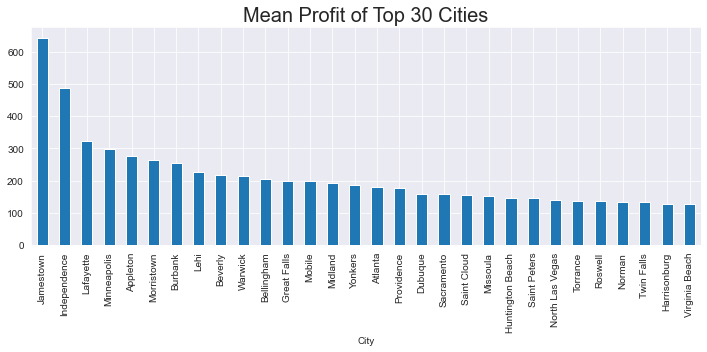

In [47]:
city_profit_top.head(30).plot.bar(figsize=(12,4))
plt.title('Mean Profit of Top 30 Cities',fontdict={'fontsize':20})

Text(0.5, 1.0, 'Mean Profit of Bottom 30 Cities')

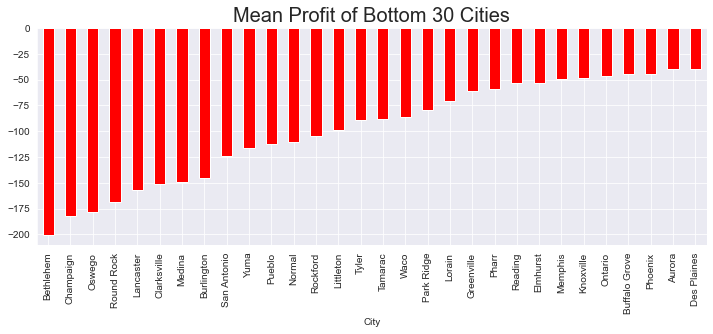

In [48]:
city_profit_bottom.head(30).plot.bar(figsize=(12,4),color='red')
plt.title('Mean Profit of Bottom 30 Cities',fontdict={'fontsize':20})

- **Highest Profit Generating city : Jamestown**
- **Least Profit Generating city : Bethlehem**
----
**Sales Analysis**

In [49]:
city_wise_sale = sales.groupby('City')['Sales'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Sum of Sales of Top 30 Cities')

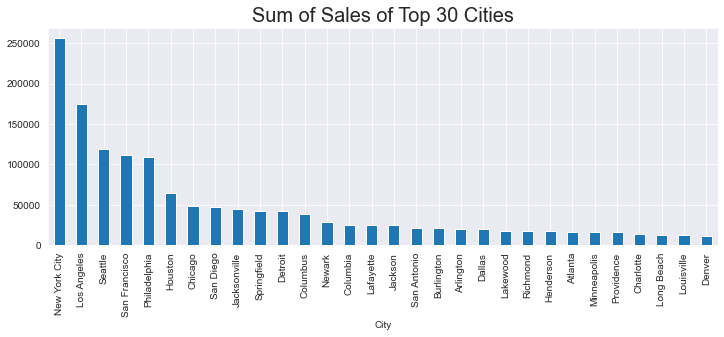

In [50]:
city_wise_sale.head(30).plot.bar(figsize=(12,4))
plt.title('Sum of Sales of Top 30 Cities',fontdict={'fontsize':20})

Text(0.5, 1.0, 'Sum of Sales of Bottom 30 Cities')

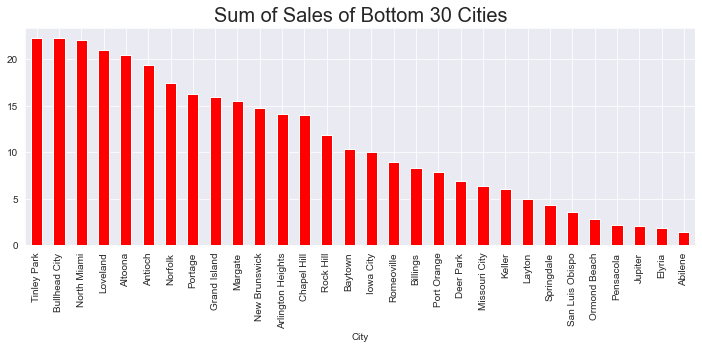

In [51]:
city_wise_sale.tail(30).plot.bar(figsize=(12,4),color='red')
plt.title('Sum of Sales of Bottom 30 Cities',fontdict={'fontsize':20})

- **Highest Contributor of Sale : New York City**
- **Least Contributor of Sale : Abilene**

Text(0, 0.5, 'Profit')

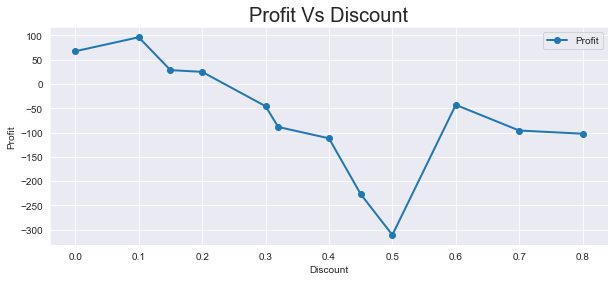

In [52]:
tab = pd.pivot_table(values=['Profit'],index='Discount',data=sales)
tab.plot(figsize=(10,4),linewidth=2,marker='o')
plt.title('Profit Vs Discount',fontdict={'fontsize':20})
plt.ylabel('Profit')

It can be clearly seen that as **Discounts increases, the Profit decreases.**

Text(0, 0.5, 'Sales')

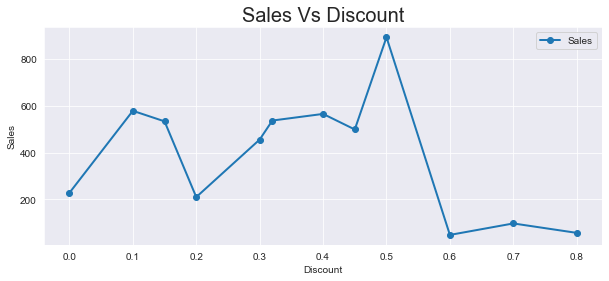

In [53]:
anytable = pd.pivot_table(values=['Sales'],index='Discount',data=sales)
anytable.plot(figsize=(10,4),linewidth=2,marker='o')
plt.title('Sales Vs Discount',fontdict={'fontsize':20})
plt.ylabel('Sales')

# Summary:

After performing exploratory data analysis on the given dataset, the following observations can be made:


In [54]:
summary = pd.DataFrame({'Variables':['Category','Sub-Category','Ship Mode','Segment','Region','State','City'],
                        'Highest Profit Generator':['Technology','Copiers','First-Class','Home Office','West','Vermont','Jamestown'],
                        'Least Profit Generator':['Furniture','Tables','Standard Class','Consumer','Central','Ohio','Bethlehem']})
summary

,Variables,Highest Profit Generator,Least Profit Generator
0,Category,Technology,Furniture
1,Sub-Category,Copiers,Tables
2,Ship Mode,First-Class,Standard Class
3,Segment,Home Office,Consumer
4,Region,West,Central
5,State,Vermont,Ohio
6,City,Jamestown,Bethlehem


Other than this the following observations can also be made:
- **Sales and Profit are positively correlated.**
- **Discount and Profit are negetively correlated.**
- **Highest Contributor of Sales (STATE)**: California
- **Highest Contributor of Sales (CITY)**: New York City
- **Least Contributor of Sales (STATE)**: North Dakota
- **Least Contributor of Sales (CITY)**: Abilene

------
Before coming to the conclusion, We have a few questions that can be answered:
1. **What products does the highest profit generating state buy?**
2. **What products does the least profit generating state buy?**

Let us look at the product and profit distribution of **Vermont** (the highest profit generating state) and **Ohio** (the least profit generating state)

Text(0, 0.5, 'Profit')

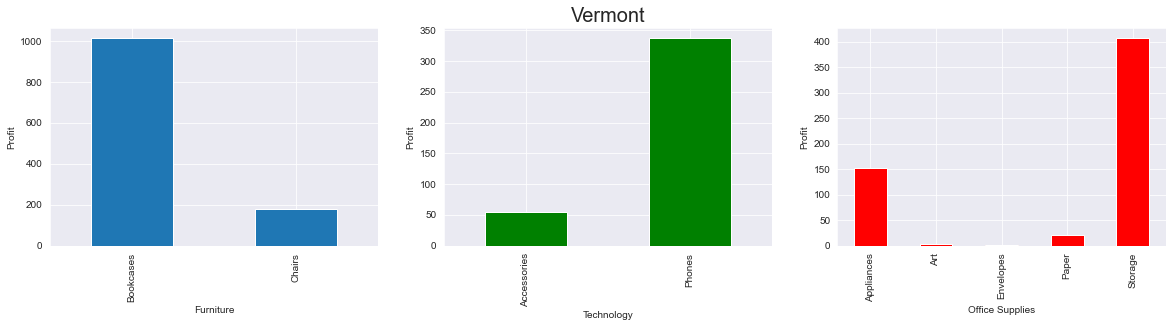

In [138]:
a = sales[sales['State']=='Vermont'].groupby(['Category','Sub-Category'])['Profit'].mean()
fig,axs = plt.subplots(1,3,figsize=(20,4))
a['Furniture'].plot.bar(ax=axs[0])
a['Technology'].plot.bar(ax=axs[1],color='green')
a['Office Supplies'].plot.bar(ax=axs[2],color='red')
axs[0].set_xlabel('Furniture')
axs[0].set_ylabel('Profit')
axs[1].set_xlabel('Technology')
axs[1].set_title('Vermont',fontsize=20)
axs[1].set_ylabel('Profit')
axs[2].set_xlabel('Office Supplies')
axs[2].set_ylabel('Profit')

Text(0, 0.5, 'Profit')

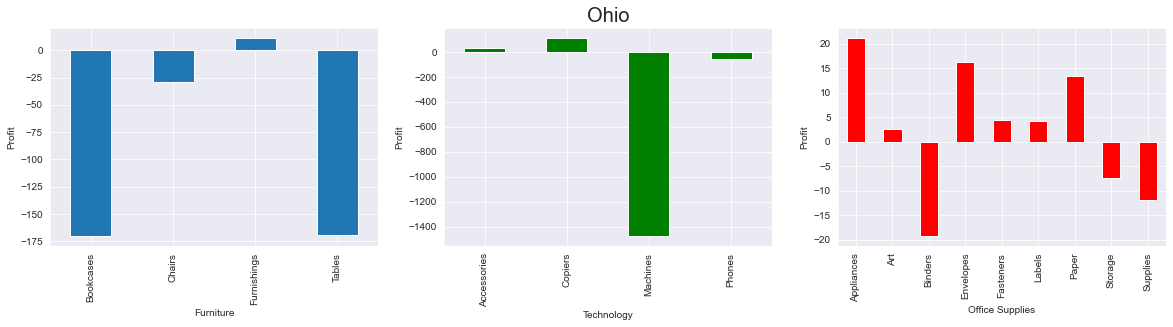

In [139]:
b = sales[sales['State']=='Ohio'].groupby(['Category','Sub-Category'])['Profit'].mean()
fig,axs = plt.subplots(1,3,figsize=(20,4))
b['Furniture'].plot.bar(ax=axs[0])
b['Technology'].plot.bar(ax=axs[1],color='green')
b['Office Supplies'].plot.bar(ax=axs[2],color='red')
axs[0].set_xlabel('Furniture')
axs[0].set_ylabel('Profit')
axs[1].set_xlabel('Technology')
axs[1].set_title('Ohio',fontsize=20)
axs[1].set_ylabel('Profit')
axs[2].set_xlabel('Office Supplies')
axs[2].set_ylabel('Profit')

# Conclusion

Using the above visulizations, one can identity the weak and strong areas of profit. Hence, for the weak areas, one can provide some discounts to gain profit in the long run. Although Discount and Profit are negetively correlated, giving discounts at the end of season or festivals attracts a large number of people, thereby profiting the store by gaining customers. Thus, though discounts lead to less/no profit but it benefits the store in the long run. Hence, discounts are essential.

Secondly, we have seen in the above visualizations that though the sales of some products (for e.g. Furniture) is very high, the profit generated is not very good. Hence, the store must devise a new plan to maximize the profit for such categories.



# Thank you!